In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

In [244]:
cust = pd.read_csv("Customers.csv")
prod = pd.read_csv("Products.csv")
tran = pd.read_csv("Transactions.csv")

In [245]:
cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [246]:
prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [247]:
tran.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#
---
# Checking Nulls

In [248]:
cust.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [249]:
prod.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [250]:
tran.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [251]:
print(f"Cutomers Shape : {cust.shape} \nProducts Shape : {prod.shape} \nTransaction Shape : {tran.shape}")

Cutomers Shape : (200, 4) 
Products Shape : (100, 4) 
Transaction Shape : (1000, 7)


## `No NULLs, We are good to go`

#
---
# Checking the datatypes correctness

In [252]:
cust.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [253]:
cust['SignupDate'] = pd.to_datetime(cust['SignupDate'])

In [254]:
cust.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [255]:
prod.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [256]:
tran.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [257]:
tran['TransactionDate'] = pd.to_datetime(tran['TransactionDate'])

In [258]:
tran.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

## `The Date features in the Customers and Transaction tables are of objects, I reassigned to datetime`

#
---
# Merging the three tables into single

In [259]:
df = pd.merge(left=tran, right=cust, on="CustomerID", how="left")

In [260]:
df = pd.merge(left=df, right=prod, on=["ProductID", "Price"], how="left")

In [261]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [262]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
dtype: int64

#
---
# Checking Outliers

Text(0.5, 1.0, 'Price boxplot')

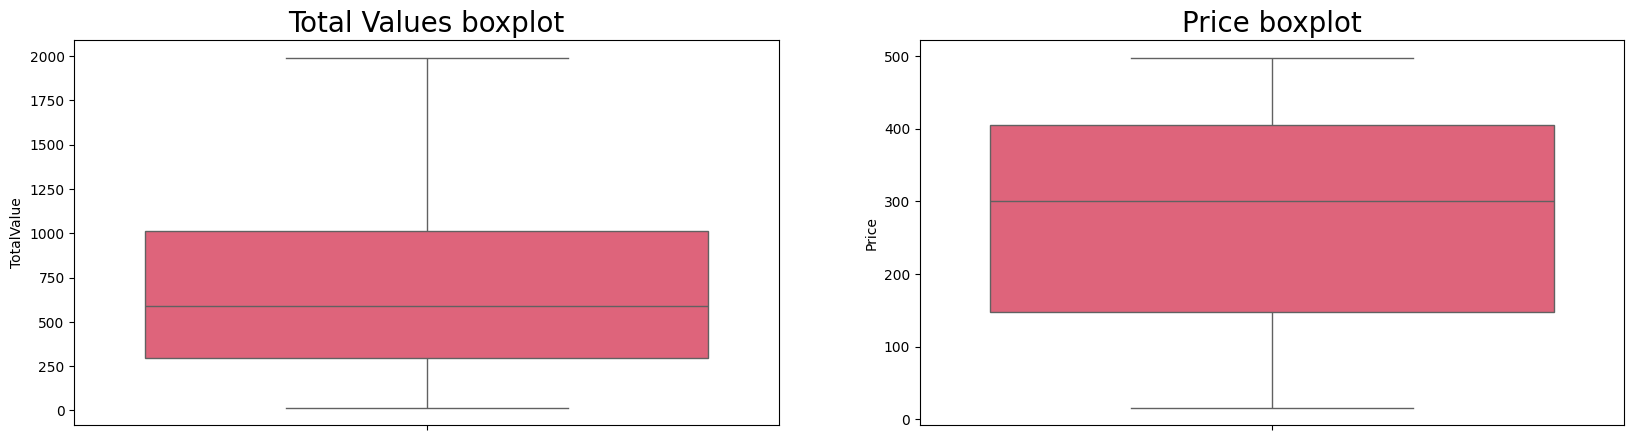

In [263]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df["TotalValue"], color="#F2506E")
plt.title("Total Values boxplot", fontdict={"size" : 20})

plt.subplot(1, 2, 2)
sns.boxplot(df["Price"], color="#F2506E")
plt.title("Price boxplot", fontdict={"size" : 20})

## `No Outliers in numeric columns`

#
---
# Creating New Feature

In [264]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


### Creating RFM (Recency, Frequency, and Monetary) on CustomerID

In [265]:
df["Recency from Today"] = (pd.Timestamp.today() - df.groupby(by="CustomerID")["TransactionDate"].transform("max")).dt.days

In [266]:
df["Frequency"] = df.groupby(by="CustomerID")["TransactionID"].transform("count")

In [267]:
df["Monetary"] = df.groupby(by="CustomerID")["TotalValue"].transform("sum")

In [268]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Recency from Today,Frequency,Monetary
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,93,4,1979.28
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,40,4,2570.80
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,129,6,3232.88
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,135,7,6604.23
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,112,4,3125.49


In [269]:
df["Difference of Transaction and Signup"] = (df["TransactionDate"] - df["SignupDate"]).dt.days

In [270]:
indexes = df[["TransactionID", "CustomerID", "ProductID"]]
df.drop(columns=["TransactionID", "CustomerID", "ProductID"], inplace=True)

In [271]:
indexes.head()

,TransactionID,CustomerID,ProductID
0,T00001,C0199,P067
1,T00112,C0146,P067
2,T00166,C0127,P067
3,T00272,C0087,P067
4,T00363,C0070,P067


In [272]:
df.head()

,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup
0,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,93,4,1979.28,631
1,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,40,4,2570.80,-100
2,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,129,6,3232.88,21
3,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,135,7,6604.23,-16
4,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,112,4,3125.49,737


In [273]:
df["CustomerName_min"] = df.groupby(by="CustomerName")["TotalValue"].transform("min")
df["CustomerName_max"] = df.groupby(by="CustomerName")["TotalValue"].transform("max")
df["CustomerName_mean"] = df.groupby(by="CustomerName")["TotalValue"].transform("mean")
df["CustomerName_median"] = df.groupby(by="CustomerName")["TotalValue"].transform("median")
df["CustomerName_std"] = df.groupby(by="CustomerName")["TotalValue"].transform("std")
# df["CustomerName_count"] = df.groupby(by="CustomerName")["TotalValue"].transform("count")
# df["CustomerName_sum"] = df.groupby(by="CustomerName")["TotalValue"].transform("sum")

In [274]:
df["CustomerName_std"] = df["CustomerName_std"].fillna(df["CustomerName_std"].median())

In [275]:
df["ProductName_min"] = df.groupby(by="ProductName")["TotalValue"].transform("min")
df["ProductName_max"] = df.groupby(by="ProductName")["TotalValue"].transform("max")
df["ProductName_mean"] = df.groupby(by="ProductName")["TotalValue"].transform("mean")
df["ProductName_median"] = df.groupby(by="ProductName")["TotalValue"].transform("median")
df["ProductName_std"] = df.groupby(by="ProductName")["TotalValue"].transform("std")
df["ProductName_count"] = df.groupby(by="ProductName")["TotalValue"].transform("count")
df["ProductName_sum"] = df.groupby(by="ProductName")["TotalValue"].transform("sum")

In [276]:
df.drop(columns=["CustomerName", "ProductName"], inplace=True)

In [277]:
df.head()

,TransactionDate,Quantity,TotalValue,Price,Region,SignupDate,Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,CustomerName_min,CustomerName_max,CustomerName_mean,CustomerName_median,CustomerName_std,ProductName_min,ProductName_max,ProductName_mean,ProductName_median,ProductName_std,ProductName_count,ProductName_sum
0,2024-08-25 12:38:23,1,300.68,300.68,Europe,2022-12-03,Electronics,93,4,1979.28,631,293.70,834.74,494.820000,425.42,256.090945,300.68,902.04,578.230769,601.36,259.281325,13,7517.0
1,2024-05-27 22:23:54,1,300.68,300.68,Asia,2024-09-04,Electronics,40,4,2570.80,-100,300.68,1011.66,642.700000,629.23,331.653906,300.68,902.04,578.230769,601.36,259.281325,13,7517.0
2,2024-04-25 07:38:55,1,300.68,300.68,Europe,2024-04-04,Electronics,129,6,3232.88,21,263.55,942.32,538.813333,413.27,306.097921,300.68,902.04,578.230769,601.36,259.281325,13,7517.0
3,2024-03-26 22:55:37,2,601.36,300.68,South America,2024-04-11,Electronics,135,7,6604.23,-16,443.85,1734.56,943.461429,909.60,415.929754,300.68,902.04,578.230769,601.36,259.281325,13,7517.0
4,2024-03-21 15:10:10,3,902.04,300.68,Europe,2022-03-15,Electronics,112,4,3125.49,737,354.29,1277.36,781.372500,746.92,399.542005,300.68,902.04,578.230769,601.36,259.281325,13,7517.0


In [278]:
from sklearn.preprocessing import OneHotEncoder

In [279]:
region_encoder = OneHotEncoder(dtype="int", drop="first", sparse_output=False)

In [280]:
df = pd.concat([df, pd.DataFrame(region_encoder.fit_transform(df[["Region"]]), columns=region_encoder.get_feature_names_out())], axis=1)

In [281]:
category_encoder = OneHotEncoder(dtype="int", drop="first", sparse_output=False)

In [282]:
df = pd.concat([df, pd.DataFrame(category_encoder.fit_transform(df[["Category"]]), columns=category_encoder.get_feature_names_out())], axis=1)

In [283]:
df.drop(columns=["Region", "Category"], inplace=True)

In [284]:
df.head()

,TransactionDate,Quantity,TotalValue,Price,SignupDate,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,CustomerName_min,CustomerName_max,CustomerName_mean,CustomerName_median,CustomerName_std,ProductName_min,ProductName_max,ProductName_mean,ProductName_median,ProductName_std,ProductName_count,ProductName_sum,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor
0,2024-08-25 12:38:23,1,300.68,300.68,2022-12-03,93,4,1979.28,631,293.70,834.74,494.820000,425.42,256.090945,300.68,902.04,578.230769,601.36,259.281325,13,7517.0,1,0,0,0,1,0
1,2024-05-27 22:23:54,1,300.68,300.68,2024-09-04,40,4,2570.80,-100,300.68,1011.66,642.700000,629.23,331.653906,300.68,902.04,578.230769,601.36,259.281325,13,7517.0,0,0,0,0,1,0
2,2024-04-25 07:38:55,1,300.68,300.68,2024-04-04,129,6,3232.88,21,263.55,942.32,538.813333,413.27,306.097921,300.68,902.04,578.230769,601.36,259.281325,13,7517.0,1,0,0,0,1,0
3,2024-03-26 22:55:37,2,601.36,300.68,2024-04-11,135,7,6604.23,-16,443.85,1734.56,943.461429,909.60,415.929754,300.68,902.04,578.230769,601.36,259.281325,13,7517.0,0,0,1,0,1,0
4,2024-03-21 15:10:10,3,902.04,300.68,2022-03-15,112,4,3125.49,737,354.29,1277.36,781.372500,746.92,399.542005,300.68,902.04,578.230769,601.36,259.281325,13,7517.0,1,0,0,0,1,0


In [285]:
df["TransactionDate_day"] = df["TransactionDate"].dt.day
df["TransactionDate_month"] = df["TransactionDate"].dt.month
df["TransactionDate_year"] = df["TransactionDate"].dt.year
df["TransactionDate_weekday"] = df["TransactionDate"].dt.weekday

In [286]:
df["SignupDate_day"] = df["SignupDate"].dt.day
df["SignupDate_month"] = df["SignupDate"].dt.month
df["SignupDate_year"] = df["SignupDate"].dt.year
df["SignupDate_weekday"] = df["SignupDate"].dt.weekday

In [287]:
df.drop(columns=["SignupDate", "TransactionDate"], inplace=True)

#
---
# Scaling

In [288]:
from sklearn.preprocessing import StandardScaler

In [289]:
scaler = StandardScaler()

In [290]:
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=scaler.get_feature_names_out())

In [291]:
scaled_df

,Quantity,TotalValue,Price,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,CustomerName_min,CustomerName_max,CustomerName_mean,CustomerName_median,CustomerName_std,ProductName_min,ProductName_max,ProductName_mean,ProductName_median,ProductName_std,ProductName_count,ProductName_sum,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
0,-1.375488,-0.789850,0.199948,0.037445,-0.935189,-1.162244,0.801657,0.595150,-1.345621,-0.907900,-0.697540,-1.352005,0.590415,-0.867804,-0.376091,-0.142662,-0.778920,-0.680884,-0.686198,1.809283,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,1.040795,0.498234,0.063372,1.567364,-1.489960,1.718916,-1.246819,0.928261
1,-1.375488,-0.789850,0.199948,-0.941141,-0.935189,-0.838261,-1.283963,0.639436,-0.884697,-0.220005,0.002246,-0.874957,0.590415,-0.867804,-0.376091,-0.142662,-0.778920,-0.680884,-0.686198,-0.552705,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,1.265710,-0.374839,0.063372,-1.459409,-1.363682,0.841918,1.116819,-0.543612
2,-1.375488,-0.789850,0.199948,0.702144,0.008493,-0.475630,-0.938737,0.403858,-1.065346,-0.703256,-0.739257,-1.036298,0.590415,-0.867804,-0.376091,-0.142662,-0.778920,-0.680884,-0.686198,1.809283,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,1.040795,-0.665863,0.063372,0.053977,-1.363682,-0.619745,1.116819,-0.052987
3,-0.480571,-0.179825,0.199948,0.812927,0.480334,1.370904,-1.044302,1.547805,0.998654,1.179050,0.964901,-0.342902,0.590415,-0.867804,-0.376091,-0.142662,-0.778920,-0.680884,-0.686198,-0.552705,-0.568112,1.513101,-0.543449,1.71377,-0.574271,1.153252,-0.956888,0.063372,-0.954947,-0.479732,-0.619745,1.116819,-0.052987
4,0.414347,0.430200,0.199948,0.388258,-0.935189,-0.534449,1.104086,0.979575,-0.192476,0.425059,0.406336,-0.446362,0.590415,-0.867804,-0.376091,-0.142662,-0.778920,-0.680884,-0.686198,1.809283,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,0.590965,-0.956888,0.063372,0.053977,0.025382,-0.912078,-1.246819,-1.034236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.375488,-0.466903,1.331565,-0.941141,0.008493,-0.365053,1.871572,-0.543721,0.818994,-0.546734,-0.634655,0.616032,-1.461415,1.033336,-0.698658,-1.599651,1.378204,-0.454150,-0.719640,-0.552705,-0.568112,1.513101,-0.543449,1.71377,-0.574271,0.928337,1.080282,0.063372,0.053977,0.909332,-1.496743,-1.246819,0.928261
996,0.414347,1.399041,1.331565,0.074372,0.952175,1.627809,-0.833173,0.682517,0.495628,0.903197,0.586081,0.088782,-1.461415,1.033336,-0.698658,-1.599651,1.378204,-0.454150,-0.719640,-0.552705,1.760216,-0.660895,-0.543449,1.71377,-0.574271,-1.320814,-0.083815,0.063372,-0.954947,-0.984846,-0.619745,1.116819,1.418886
997,1.309264,2.332014,1.331565,1.588410,-0.463348,0.372762,-1.480828,1.547805,1.271895,1.239097,0.987699,0.635657,-1.461415,1.033336,-0.698658,-1.599651,1.378204,-0.454150,-0.719640,-0.552705,1.760216,-0.660895,-0.543449,1.71377,-0.574271,-1.208357,-0.665863,0.063372,0.558440,0.783053,0.841918,1.116819,0.928261
998,-0.480571,0.466069,1.331565,-1.014996,-1.407030,-0.528047,-1.121336,2.537640,0.693941,1.654759,0.999648,0.316892,-1.461415,1.033336,-0.698658,-1.599651,1.378204,-0.454150,-0.719640,-0.552705,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,1.490625,0.789258,0.063372,1.567364,-0.479732,1.426584,1.116819,-1.524861


#
---
# Combining the scaled df with index

In [314]:
new_df = pd.concat([indexes, scaled_df], axis=1)

## As there are multiple instances for each customer, example as shown below, customer 1 has 5 transaction. This is because we have joined the tables. **So, I will be doing averaging for each customer to make multiple values into single**

In [315]:
new_df[new_df["CustomerID"] == "C0001"]

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,CustomerName_min,CustomerName_max,CustomerName_mean,CustomerName_median,CustomerName_std,ProductName_min,ProductName_max,ProductName_mean,ProductName_median,ProductName_std,ProductName_count,ProductName_sum,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
135,T00015,C0001,P054,-0.480571,-1.167373,-1.530249,-0.091802,-0.463348,-0.409007,0.593380,-0.541183,-0.131096,-0.088808,-0.046819,-0.085864,-1.164238,0.711193,-0.569403,-1.152331,0.759351,1.132993,0.215237,-0.552705,-0.568112,1.513101,-0.543449,-0.583509,-0.574271,0.366049,-1.538936,0.063372,0.558440,-0.606011,0.257253,-1.246819,1.418886
442,T00932,C0001,P022,0.414347,-0.562745,-0.959820,-0.091802,-0.463348,-0.409007,1.283832,-0.541183,-0.131096,-0.088808,-0.046819,-0.085864,-0.585746,-1.581451,-1.149361,-0.654713,-1.532789,-0.454150,-0.958383,-0.552705,-0.568112,1.513101,-0.543449,-0.583509,1.741338,0.141134,0.789258,0.063372,-0.954947,-0.606011,0.257253,-1.246819,1.418886
546,T00085,C0001,P096,-0.480571,-0.152274,0.248219,-0.091802,-0.463348,-0.409007,0.821629,-0.541183,-0.131096,-0.088808,-0.046819,-0.085864,-0.161394,-0.202912,-0.089279,-0.105820,-0.560667,2.153299,1.416511,-0.552705,-0.568112,1.513101,-0.543449,1.713770,-0.574271,-0.870984,-0.665863,0.063372,-1.459409,-0.606011,0.257253,-1.246819,1.418886
724,T00445,C0001,P083,-0.480571,0.449270,1.302134,-0.091802,-0.463348,-0.409007,0.904369,-0.541183,-0.131096,-0.088808,-0.046819,-0.085864,0.336856,0.999751,0.967205,0.871484,0.298787,2.380034,3.066548,-0.552705,-0.568112,1.513101,-0.543449,1.713770,-0.574271,-0.983441,-0.374839,0.063372,-0.954947,-0.606011,0.257253,-1.246819,1.418886
776,T00436,C0001,P029,0.414347,1.239454,1.145166,-0.091802,-0.463348,-0.409007,1.415075,-0.541183,-0.131096,-0.088808,-0.046819,-0.085864,1.548993,0.820629,1.540761,1.755243,0.709978,-0.227415,0.739419,-0.552705,-0.568112,1.513101,-0.543449,1.713770,-0.574271,-1.545729,1.371306,0.063372,1.062902,-0.606011,0.257253,-1.246819,1.418886


In [316]:
new_df.drop(["TransactionID", "ProductID"], axis=1, inplace=True)

In [318]:
new_df.head()

,CustomerID,Quantity,TotalValue,Price,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,CustomerName_min,CustomerName_max,CustomerName_mean,CustomerName_median,CustomerName_std,ProductName_min,ProductName_max,ProductName_mean,ProductName_median,ProductName_std,ProductName_count,ProductName_sum,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
0,C0199,-1.375488,-0.789850,0.199948,0.037445,-0.935189,-1.162244,0.801657,0.595150,-1.345621,-0.907900,-0.697540,-1.352005,0.590415,-0.867804,-0.376091,-0.142662,-0.77892,-0.680884,-0.686198,1.809283,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,1.040795,0.498234,0.063372,1.567364,-1.489960,1.718916,-1.246819,0.928261
1,C0146,-1.375488,-0.789850,0.199948,-0.941141,-0.935189,-0.838261,-1.283963,0.639436,-0.884697,-0.220005,0.002246,-0.874957,0.590415,-0.867804,-0.376091,-0.142662,-0.77892,-0.680884,-0.686198,-0.552705,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,1.265710,-0.374839,0.063372,-1.459409,-1.363682,0.841918,1.116819,-0.543612
2,C0127,-1.375488,-0.789850,0.199948,0.702144,0.008493,-0.475630,-0.938737,0.403858,-1.065346,-0.703256,-0.739257,-1.036298,0.590415,-0.867804,-0.376091,-0.142662,-0.77892,-0.680884,-0.686198,1.809283,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,1.040795,-0.665863,0.063372,0.053977,-1.363682,-0.619745,1.116819,-0.052987
3,C0087,-0.480571,-0.179825,0.199948,0.812927,0.480334,1.370904,-1.044302,1.547805,0.998654,1.179050,0.964901,-0.342902,0.590415,-0.867804,-0.376091,-0.142662,-0.77892,-0.680884,-0.686198,-0.552705,-0.568112,1.513101,-0.543449,1.71377,-0.574271,1.153252,-0.956888,0.063372,-0.954947,-0.479732,-0.619745,1.116819,-0.052987
4,C0070,0.414347,0.430200,0.199948,0.388258,-0.935189,-0.534449,1.104086,0.979575,-0.192476,0.425059,0.406336,-0.446362,0.590415,-0.867804,-0.376091,-0.142662,-0.77892,-0.680884,-0.686198,1.809283,-0.568112,-0.660895,-0.543449,1.71377,-0.574271,0.590965,-0.956888,0.063372,0.053977,0.025382,-0.912078,-1.246819,-1.034236


In [323]:
avg_df = new_df.groupby(by="CustomerID").mean()

In [326]:
avg_df

,Quantity,TotalValue,Price,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,CustomerName_min,CustomerName_max,CustomerName_mean,CustomerName_median,CustomerName_std,ProductName_min,ProductName_max,ProductName_mean,ProductName_median,ProductName_std,ProductName_count,ProductName_sum,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C0001,-0.122604,-0.038733,0.041090,-0.091802,-0.463348,-0.409007,1.003657,-0.541183,-0.131096,-0.088808,-0.046819,-0.085864,-0.005106,0.149442,0.139985,0.142772,-0.065068,0.996952,0.895866,-0.552705,-0.568112,1.513101,-0.543449,0.794859,-0.111149,-0.578594,-0.083815,0.063372,-0.349592,-0.606011,0.257253,-1.246819,1.418886
C0002,-0.033112,-0.455085,-0.452377,-0.664183,-0.935189,-1.226075,1.496388,0.347834,-1.512358,-1.043428,-0.720819,-1.582891,-0.071131,-0.390004,-0.064404,0.145207,-0.312799,-0.765910,-0.575551,-0.552705,-0.568112,-0.660895,0.648325,-0.583509,0.583533,-0.252467,0.134453,0.063372,-0.450485,-0.227175,-1.204411,-1.246819,1.418886
C0003,0.861805,-0.017550,-0.546305,1.200669,-0.935189,-0.753595,-0.755425,-0.491948,0.088476,-0.040240,-0.067523,0.562082,-0.312001,0.057354,-0.060933,-0.152602,-0.048520,0.679524,0.805825,-0.552705,-0.568112,1.513101,0.052438,-0.009189,0.583533,-0.055666,-0.229327,0.063372,0.684555,-0.984846,-0.912078,1.116819,-0.052987
C0004,0.302482,-0.041866,-0.226905,-1.033460,0.952175,0.686618,0.895453,0.595150,-0.655172,-0.095991,-0.165001,-0.914522,-0.096031,0.351821,-0.024941,-0.061316,0.083776,0.339422,0.332902,-0.552705,-0.568112,1.513101,-0.543449,-0.009189,0.294082,0.267649,0.352721,0.063372,-0.324369,-0.732289,1.134251,-1.246819,1.418886
C0005,-0.182265,-0.024175,0.135422,-0.128730,-1.407030,-1.132142,0.921488,0.756940,-1.276738,-0.055428,0.773517,-1.006482,0.524977,0.127831,0.267669,0.382710,0.007375,-0.605306,-0.222527,-0.552705,-0.568112,-0.660895,-0.543449,0.948010,0.197599,-0.870984,0.013193,0.063372,0.222131,0.025382,0.549585,-1.246819,-1.524861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0196,0.414347,1.127464,1.026818,-0.885749,-0.935189,0.482868,1.452165,1.379798,0.829103,2.585070,2.813558,0.649314,-0.210581,0.685578,0.757771,0.350683,1.279078,0.424447,0.680716,1.809283,-0.568112,-0.660895,0.052438,-0.583509,0.583533,-0.308696,1.080282,0.063372,-0.198254,-0.984846,-0.035080,-1.246819,-1.034236
C0197,0.414347,-0.095582,-0.323443,-1.107316,-1.407030,-1.189975,0.293804,1.629969,-0.879304,-0.219152,-0.585263,-0.941186,-0.018862,-0.643226,-0.271949,0.008533,-0.654952,0.188265,-0.003582,1.809283,-0.568112,-0.660895,-0.543449,0.948010,0.197599,0.028677,-0.083815,0.063372,0.390286,0.783053,-0.912078,-0.065000,-1.034236
C0198,-0.928029,-0.454619,-0.233525,0.443650,-1.878871,-1.735947,1.704665,-1.097041,-1.162992,-1.042358,-0.558499,0.950076,0.150814,-0.752648,-0.462101,-0.166659,-0.524046,-1.020986,-0.922710,1.809283,-0.568112,-0.660895,0.648325,0.565131,-0.574271,0.084905,0.934770,0.063372,1.062902,1.540724,-1.204411,-1.246819,1.418886


#
---
# Finding Cosine Similarity

In [347]:
from sklearn.metrics.pairwise import cosine_similarity

In [348]:
similarity_matrix = cosine_similarity(avg_df)

customers = []
similar_customers = []
customer_ids = avg_df.index.tolist()

for i in range(20):
    similarities = list(enumerate(similarity_matrix[i]))
    similarities = sorted(similarities, key=lambda x: abs(x[1]), reverse=True)[1:4]
    customers.append(customer_ids[i])
    similar_customers.append([(customer_ids[i], abs(score)) for i, score in similarities])

In [349]:
final = pd.DataFrame({"Customer" : customers, "Similar Customers" : similar_customers})
final

,Customer,Similar Customers
0,C0001,"[(C0112, 0.6491154532687723), (C0124, 0.627210..."
1,C0002,"[(C0134, 0.7689583056468934), (C0043, 0.760814..."
2,C0003,"[(C0052, 0.696389836550591), (C0095, 0.6282021..."
3,C0004,"[(C0183, 0.6425255334730964), (C0001, 0.622688..."
4,C0005,"[(C0186, 0.6557931822287686), (C0027, 0.622913..."
5,C0006,"[(C0187, 0.7488236155744904), (C0148, 0.732845..."
6,C0007,"[(C0020, 0.6150360282587031), (C0074, 0.549999..."
7,C0008,"[(C0194, 0.7326910065193255), (C0168, 0.693798..."
8,C0009,"[(C0119, 0.8507053146202186), (C0019, 0.694451..."
9,C0010,"[(C0062, 0.6745690435654469), (C0087, 0.670735..."


In [350]:
final.to_csv("Dileep_Patcha_Lookalike.csv", index=False)